# Time Series EDA

By Vivian Zeng

U of Notre Dame

In [2]:
import pandas as pd

In [3]:
%matplotlib inline

kaggle = pd.read_csv("kaggle.csv")
kaggle.head()

,Unnamed: 0,BusinessDate,BranchID,CashOrdersReceived,CashBalance_StartOfDay,TotalCashUsed,CashToVault,CashUnder,CashOver,TotalCashDisbursed,TotalCashOpeningBalance,TotalCashReceivedAllSources
0,1,2020-07-31,99,0.00,775054.00,-43718.13,0.0,0.0,0.0,1196392.62,1095684.09,875762.53
1,2,2020-07-30,99,0.00,1036464.13,261410.14,0.0,0.0,0.0,0.00,1036464.13,0.00
2,3,2020-07-29,99,400540.11,1141386.84,104922.70,0.0,0.0,0.0,0.00,1141386.84,0.00
3,4,2020-07-28,99,0.00,864871.20,124024.48,0.0,0.0,0.0,0.00,864871.20,0.00
4,5,2020-07-27,99,0.00,923948.57,59077.37,0.0,0.0,0.0,0.00,923948.57,0.00


In [4]:
kaggle=kaggle.drop(kaggle.columns[0], axis=1)
kaggle.head()

,BusinessDate,BranchID,CashOrdersReceived,CashBalance_StartOfDay,TotalCashUsed,CashToVault,CashUnder,CashOver,TotalCashDisbursed,TotalCashOpeningBalance,TotalCashReceivedAllSources
0,2020-07-31,99,0.00,775054.00,-43718.13,0.0,0.0,0.0,1196392.62,1095684.09,875762.53
1,2020-07-30,99,0.00,1036464.13,261410.14,0.0,0.0,0.0,0.00,1036464.13,0.00
2,2020-07-29,99,400540.11,1141386.84,104922.70,0.0,0.0,0.0,0.00,1141386.84,0.00
3,2020-07-28,99,0.00,864871.20,124024.48,0.0,0.0,0.0,0.00,864871.20,0.00
4,2020-07-27,99,0.00,923948.57,59077.37,0.0,0.0,0.0,0.00,923948.57,0.00


In [5]:
kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171230 entries, 0 to 171229
Data columns (total 11 columns):
BusinessDate                   171230 non-null object
BranchID                       171230 non-null int64
CashOrdersReceived             171230 non-null float64
CashBalance_StartOfDay         168463 non-null float64
TotalCashUsed                  171230 non-null float64
CashToVault                    171230 non-null float64
CashUnder                      171230 non-null float64
CashOver                       171230 non-null float64
TotalCashDisbursed             171230 non-null float64
TotalCashOpeningBalance        168463 non-null float64
TotalCashReceivedAllSources    171230 non-null float64
dtypes: float64(9), int64(1), object(1)
memory usage: 14.4+ MB


# Missing values

In [6]:
kaggle.isnull().sum()

BusinessDate                      0
BranchID                          0
CashOrdersReceived                0
CashBalance_StartOfDay         2767
TotalCashUsed                     0
CashToVault                       0
CashUnder                         0
CashOver                          0
TotalCashDisbursed                0
TotalCashOpeningBalance        2767
TotalCashReceivedAllSources       0
dtype: int64

In [7]:
kaggle.isnull().sum().sum()

5534

In [8]:
# Convert date to a datetime object
kaggle.BusinessDate = pd.to_datetime(kaggle.BusinessDate)
kaggle.head()

,BusinessDate,BranchID,CashOrdersReceived,CashBalance_StartOfDay,TotalCashUsed,CashToVault,CashUnder,CashOver,TotalCashDisbursed,TotalCashOpeningBalance,TotalCashReceivedAllSources
0,2020-07-31,99,0.00,775054.00,-43718.13,0.0,0.0,0.0,1196392.62,1095684.09,875762.53
1,2020-07-30,99,0.00,1036464.13,261410.14,0.0,0.0,0.0,0.00,1036464.13,0.00
2,2020-07-29,99,400540.11,1141386.84,104922.70,0.0,0.0,0.0,0.00,1141386.84,0.00
3,2020-07-28,99,0.00,864871.20,124024.48,0.0,0.0,0.0,0.00,864871.20,0.00
4,2020-07-27,99,0.00,923948.57,59077.37,0.0,0.0,0.0,0.00,923948.57,0.00


In [9]:
kaggle[['BusinessDate']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171230 entries, 0 to 171229
Data columns (total 1 columns):
BusinessDate    171230 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.3 MB


the data type is now datetime64[ns] which is a datetime format based on the Numpy library that can handle up to nanosecond precision, this is the significance of the [ns]

In [10]:
# Extract the year
kaggle.BusinessDate.dt.year.unique()

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010])

In [11]:
# Extract the month
kaggle.BusinessDate.dt.month.unique()

array([ 7,  6,  5,  4,  3,  2,  1, 12, 11, 10,  9,  8])

In [12]:
# Extract the day of the week
kaggle.BusinessDate.dt.dayofweek.unique()

array([4, 3, 2, 1, 0, 6, 5])

In [13]:
# Extract the name of the day of the week for the observation
kaggle.BusinessDate.dt.day_name().head()

0       Friday
1     Thursday
2    Wednesday
3      Tuesday
4       Monday
Name: BusinessDate, dtype: object

In [14]:
# Determine if beginning of month
kaggle.BusinessDate.dt.is_month_start.head()

0    False
1    False
2    False
3    False
4    False
Name: BusinessDate, dtype: bool

In [15]:
# Extract the month name for the observation
kaggle.BusinessDate.dt.month_name().head()

0    July
1    July
2    July
3    July
4    July
Name: BusinessDate, dtype: object

# EDA

In [16]:
# Set date to be index
kaggle.set_index('BusinessDate', inplace = True)
kaggle.index

DatetimeIndex(['2020-07-31', '2020-07-30', '2020-07-29', '2020-07-28',
               '2020-07-27', '2020-07-26', '2020-07-25', '2020-07-24',
               '2020-07-23', '2020-07-22',
               ...
               '2010-01-10', '2010-01-09', '2010-01-08', '2010-01-07',
               '2010-01-06', '2010-01-05', '2010-01-04', '2010-01-03',
               '2010-01-02', '2010-01-01'],
              dtype='datetime64[ns]', name='BusinessDate', length=171230, freq=None)

In [17]:
kaggle.head()

,BranchID,CashOrdersReceived,CashBalance_StartOfDay,TotalCashUsed,CashToVault,CashUnder,CashOver,TotalCashDisbursed,TotalCashOpeningBalance,TotalCashReceivedAllSources
BusinessDate,,,,,,,,,,
2020-07-31,99,0.00,775054.00,-43718.13,0.0,0.0,0.0,1196392.62,1095684.09,875762.53
2020-07-30,99,0.00,1036464.13,261410.14,0.0,0.0,0.0,0.00,1036464.13,0.00
2020-07-29,99,400540.11,1141386.84,104922.70,0.0,0.0,0.0,0.00,1141386.84,0.00
2020-07-28,99,0.00,864871.20,124024.48,0.0,0.0,0.0,0.00,864871.20,0.00
2020-07-27,99,0.00,923948.57,59077.37,0.0,0.0,0.0,0.00,923948.57,0.00


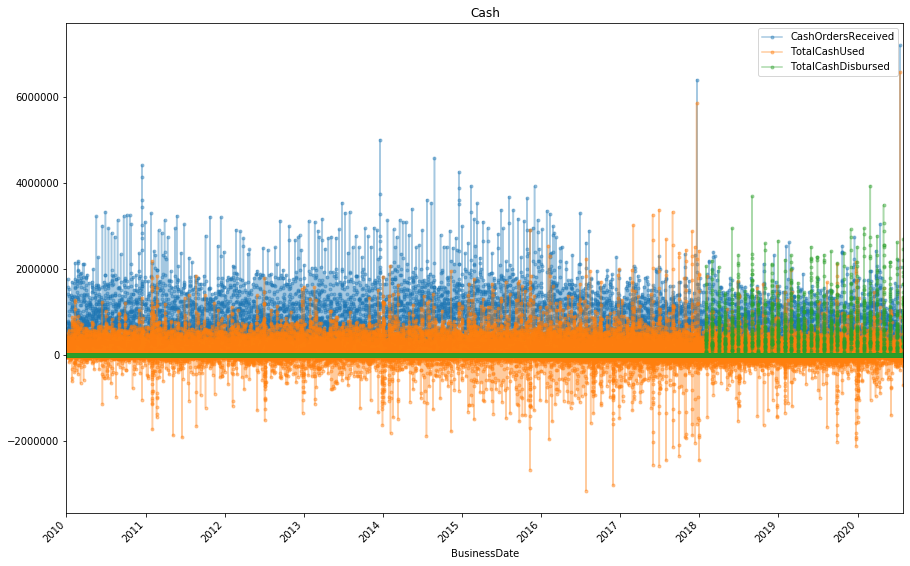

In [18]:
# Plot the some cash columns
%matplotlib inline
kaggle[['CashOrdersReceived', 
         'TotalCashUsed', 
         'TotalCashDisbursed']].plot(rot = 45, 
                                figsize = (15, 10), 
                                marker = ".", 
                                alpha = 0.4,
                                title = "Cash")

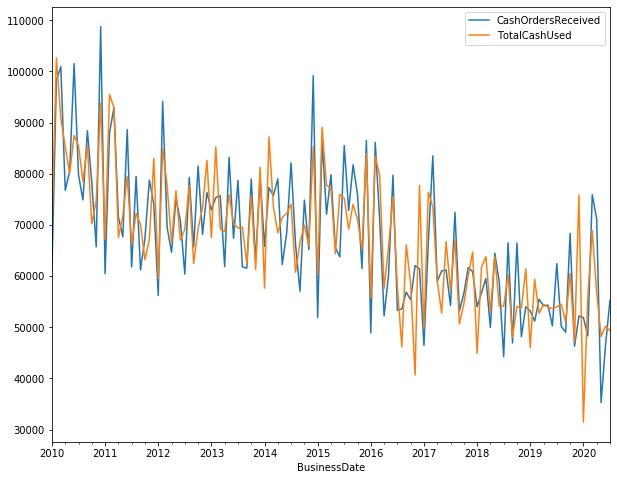

In [19]:
# Some verage monthly cash columns
kaggle.resample('M').agg({'CashOrdersReceived':'mean', 
                           'TotalCashUsed':'mean'}).plot(figsize = (10,8))

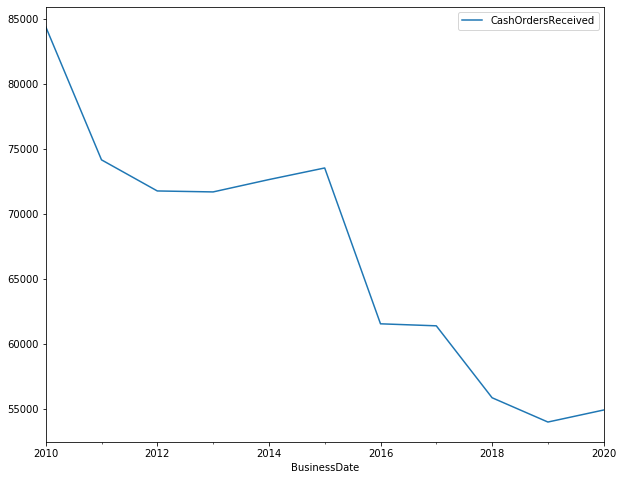

In [20]:
# Average CashOrdersReceived based on year
kaggle.resample('Y').agg({'CashOrdersReceived':'mean'}).plot(figsize = (10,8))

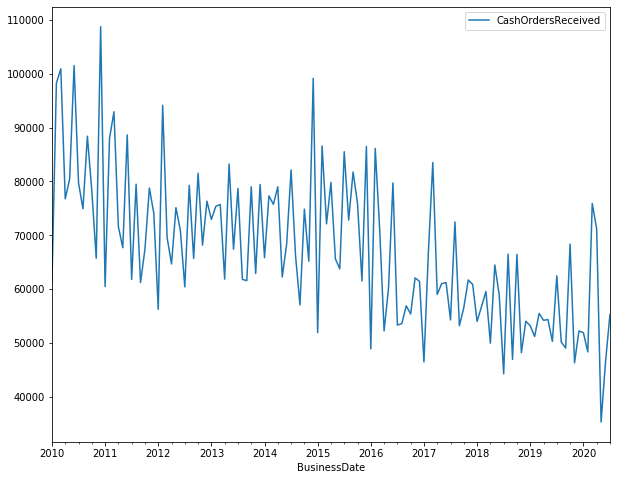

In [21]:
# Average CashOrdersReceived based on month
kaggle.resample('M').agg({'CashOrdersReceived':'mean'}).plot(figsize = (10,8))

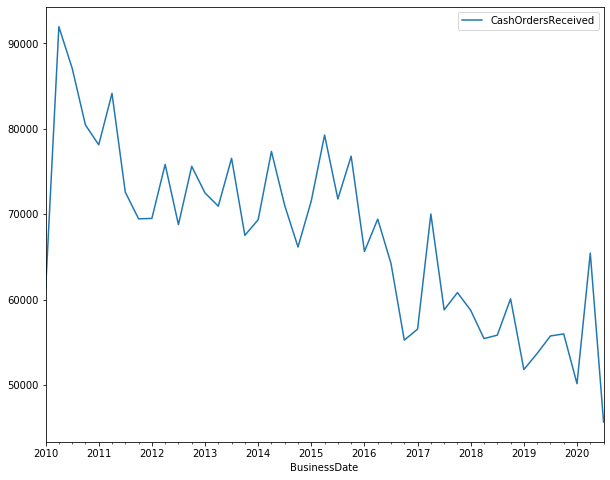

In [22]:
# Average CashOrdersReceived based on quarter
kaggle.resample('3M').agg({'CashOrdersReceived':'mean'}).plot(figsize = (10,8))